# I. Define the Problem
For this small project I am going to analyze characteristics of auto insurance claims. We want to build a model to predict the 'Location_Code' of a customer based on these characteristics.

# II. Collect the Data
First thing we need to do is get that data into our environment quickly. Importing flat files using the Pandas package is considered the standard and best practice approach in Python.

In [65]:
# Import Python Libraries
import pandas as pd                               # for structured data operations and manipulations
import numpy as np                                # for scientific computing 
from sklearn.preprocessing import LabelEncoder    # for mapping categorical data to a numeric value
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Sets the number of max columns shown
pd.set_option('display.max_columns', None) 

filename = 'Auto_Insurance_Claims_Sample.csv'
df_autoclaims = pd.read_csv(filename)
print(filename + ' successfully loaded.')

Auto_Insurance_Claims_Sample.csv successfully loaded.


# III. Cleanse the Data
It is common to complete some data cleansing or wrangling processes up font before we being to explore our data, as well as during our data exploration as we learn more about our data. Data cleansing is important to make sure our data is in a format and structure that can be easily consumed by our analysis and models. This might include task such as checking for proper data types and converting data to correct data types/formats when needed. This can also involve stripping characters from the strings. There might also be some missing values in the dataset that need to be handled by adding or deleting some values.

So let's preview the data we loaded and see if there is any data cleansing needed to add more value to this dataset initially. We will take a quick look at the first 5 and last 5 rows of our dataframe.

In [3]:
df_autoclaims.head()

,Customer,Country,State_Code,State,Claim_Amount,Response,Coverage,Education,Effective_To_Date,Employment_Status,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Claim_Reason,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,US,KS,Kansas,276.351928,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Collision,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,US,NE,Nebraska,697.953590,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Scratch/Dent,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,US,OK,Oklahoma,1288.743165,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Collision,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,US,MO,Missouri,764.586183,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Collision,Call Center,529.881344,SUV,Medsize
4,HB64268,US,KS,Kansas,281.369258,No,Basic,Bachelor,2/3/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Collision,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df_autoclaims.tail()

,Customer,Country,State_Code,State,Claim_Amount,Response,Coverage,Education,Effective_To_Date,Employment_Status,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Claim_Reason,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
9129,LA72316,US,MO,Missouri,2340.598798,No,Basic,Bachelor,2/10/2011,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Hail,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,US,MO,Missouri,309.651122,Yes,Extended,College,2/12/2011,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Collision,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,US,MO,Missouri,816.389043,No,Extended,Bachelor,2/6/2011,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Collision,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,US,MO,Missouri,752.444244,No,Extended,College,2/3/2011,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Scratch/Dent,Branch,691.200000,Four-Door Car,Large
9133,Y167826,US,MO,Missouri,261.183687,No,Extended,College,2/14/2011,Unemployed,M,0,Suburban,Single,77,3,90,0,1,Corporate Auto,Corporate L3,Other,Call Center,369.600000,Two-Door Car,Medsize


We should also make sure our dataset is complete, as well as clean. We can start by looking at the metadata for the columns to make sure the data types are accurate and optimal, as well as check for null values/missing values.

In [5]:
# View information about the DataFrame metadata
df_autoclaims.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State_Code                       9134 non-null object
State                            9134 non-null object
Claim_Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective_To_Date                9134 non-null object
Employment_Status                9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location_Code                    9134 non-null object
Marital_Status                   9134 non-null object
Monthly_Premium_Auto             9134 non-null int64
Months_Since_Last_Claim          9134 non-null int64
Months_Since_Policy_Inception  

Looks like the dataset is compelte, with no missing values or null values in any of the columns, however some of the data types do not appear to be accurate or optimized. Since we will be doing some **data cleansing** I like to create a copy of the dataset to work with going forward, this way there is a copy of the raw data still available if needed later.

In [6]:
# Create copy of data to preprocess for our analysis
df_autoclaims_clean = df_autoclaims.copy()

To start, it is a good practice to change any date related column to a datetime format. This can help with time-series analysis. 

In [7]:
from dateutil import parser

df_autoclaims_clean['Effective_To_Date'] = df_autoclaims_clean['Effective_To_Date'].apply(lambda x: parser.parse(x))

# View information about the DataFrame metadata
df_autoclaims_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null object
State_Code                       9134 non-null object
State                            9134 non-null object
Claim_Amount                     9134 non-null float64
Response                         9134 non-null object
Coverage                         9134 non-null object
Education                        9134 non-null object
Effective_To_Date                9134 non-null datetime64[ns]
Employment_Status                9134 non-null object
Gender                           9134 non-null object
Income                           9134 non-null int64
Location_Code                    9134 non-null object
Marital_Status                   9134 non-null object
Monthly_Premium_Auto             9134 non-null int64
Months_Since_Last_Claim          9134 non-null int64
Months_Since_Policy_Inc

While we are in a data cleansing mood, lets convert some of these object features to type 'category' where it makes sense. This is a good practice as the Category data type uses less memory which will improve performance for some operations, such as the **groupby()** operation.

In [8]:
cat_cols = ['State_Code', 'Country','State', 'Response', 'Coverage', 'Education', 'Employment_Status', 'Gender', 
            'Location_Code', 'Marital_Status', 'Policy_Type', 'Claim_Reason', 'Sales_Channel', 'Vehicle_Class', 
            'Vehicle_Size']

df_autoclaims_clean[cat_cols] = df_autoclaims_clean[cat_cols].apply(pd.Categorical)

# View information about the DataFrame metadata
df_autoclaims_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 26 columns):
Customer                         9134 non-null object
Country                          9134 non-null category
State_Code                       9134 non-null category
State                            9134 non-null category
Claim_Amount                     9134 non-null float64
Response                         9134 non-null category
Coverage                         9134 non-null category
Education                        9134 non-null category
Effective_To_Date                9134 non-null datetime64[ns]
Employment_Status                9134 non-null category
Gender                           9134 non-null category
Income                           9134 non-null int64
Location_Code                    9134 non-null category
Marital_Status                   9134 non-null category
Monthly_Premium_Auto             9134 non-null int64
Months_Since_Last_Claim          9134 non-null int64
Mon

# IV. Explore the Data
Now we have our data imported into our environment and have tidied the data, we need to start exploring our data to understand what we are working with more. In this stage we will plot data, look for anomalies and identify any useful patterns.


But first we need to address some of the fundamental questions, starting with what is the number of entries in the dataset. To gather this insight we can leverage **Pandas** dataframe attribute **shape**.

In [9]:
print('{0} rows and {1} columns are loaded to the Auto Insurance Claims dataframe.'.format(df_autoclaims_clean.shape[0], df_autoclaims_clean.shape[1]))

9134 rows and 26 columns are loaded to the Auto Insurance Claims dataframe.


## Summarize the Data
Now that we have a better understanding of the general shape of the data and have previewed the dataset, lets look at a statistical summary of out features. One useful method is the **Pandas** method **describe()**. This method provides some descriptive statisticals which summarize the central tendency, dispersion, and shape of a dataset’s distribution, excluding NaN values. The three main numerical measures for the center of a distribution are the mode, mean(µ), and the median (M). The mode is the most frequently occurring value. The mean is the average value, while the median is the middle value.

In [10]:
df_autoclaims_clean.describe()

,Claim_Amount,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,800.494047,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,687.096761,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,189.800768,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,399.425179,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,578.018220,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,896.216704,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,8332.538119,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


## Univariate Analysis
Next we can plot the univariate distribution of the numerical columns we summarized above. We will contain histograms and the estimated Probability Density Function (PDF) for our numeric features. The PDF is a function whose value at any given sample (or point) in the sample space (the set of possible values taken by the random variable) can be interpreted as providing a relative likelihood that the value of the random variable would equal that sample. (wiki). We use **displot()** of the **seaborn** library to plot this graph.

C:\Users\jejohn\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


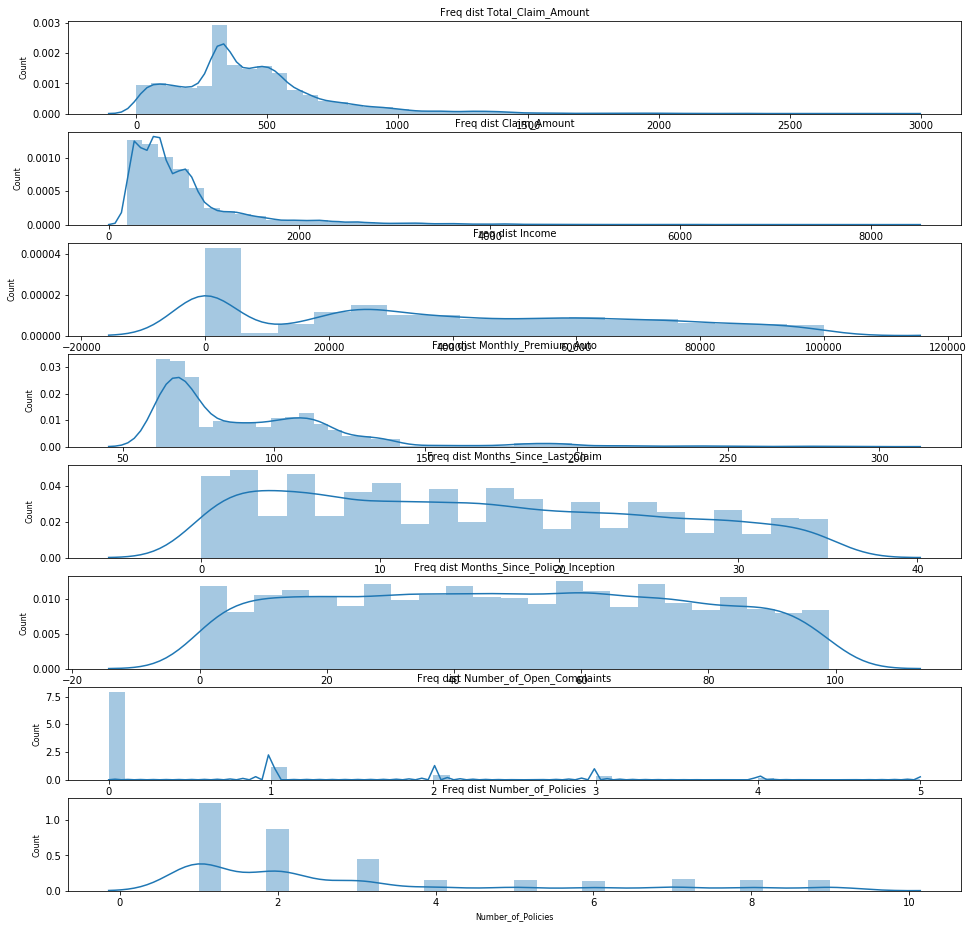

In [11]:
col_names = ['Total_Claim_Amount','Claim_Amount','Income','Monthly_Premium_Auto','Months_Since_Last_Claim','Months_Since_Policy_Inception','Number_of_Open_Complaints','Number_of_Policies']

fig, ax = plt.subplots(len(col_names), figsize=(16,16))

for i, col_val in enumerate(col_names):

    sns.distplot(df_autoclaims_clean[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

Since the above analysis focused mainly on the numeric features, lets explore our categorical features to gain more insight for our predictions.

Customer Demographic Distributions

State
Iowa        2601
Kansas       798
Missouri    3150
Nebraska    1703
Oklahoma     882
dtype: int64


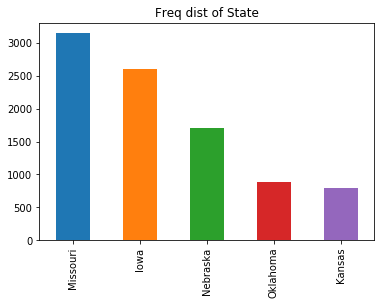

In [12]:
print(df_autoclaims_clean.groupby('State').size())
df_autoclaims_clean['State'].value_counts().plot.bar(title="Freq dist of State")

Location_Code
Rural       1773
Suburban    5779
Urban       1582
dtype: int64


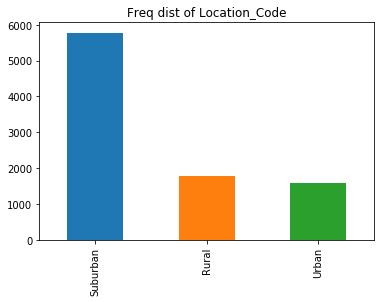

In [13]:
print(df_autoclaims_clean.groupby('Location_Code').size())
df_autoclaims_clean['Location_Code'].value_counts().plot.bar(title="Freq dist of Location_Code")

Gender
F    4658
M    4476
dtype: int64


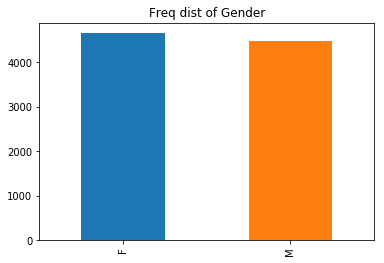

In [14]:
print(df_autoclaims_clean.groupby('Gender').size())
df_autoclaims_clean['Gender'].value_counts().plot.bar(title="Freq dist of Gender")

Education
Bachelor                2748
College                 2681
Doctor                   342
High School or Below    2622
Master                   741
dtype: int64


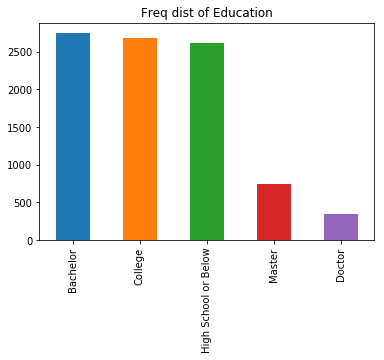

In [15]:
print(df_autoclaims_clean.groupby('Education').size())
df_autoclaims_clean['Education'].value_counts().plot.bar(title="Freq dist of Education")

Employment_Status
Disabled          405
Employed         5698
Medical Leave     432
Retired           282
Unemployed       2317
dtype: int64


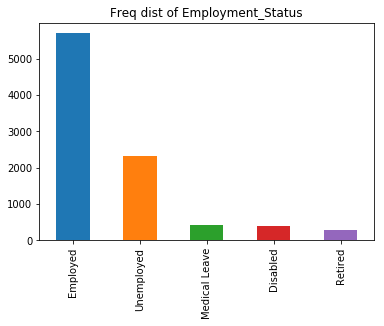

In [16]:
print(df_autoclaims_clean.groupby('Employment_Status').size())
df_autoclaims_clean['Employment_Status'].value_counts().plot.bar(title="Freq dist of Employment_Status")

Marital_Status
Divorced    1369
Married     5298
Single      2467
dtype: int64


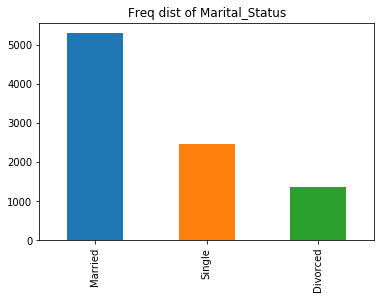

In [17]:
print(df_autoclaims_clean.groupby('Marital_Status').size())
df_autoclaims_clean['Marital_Status'].value_counts().plot.bar(title="Freq dist of Marital_Status")

Insurance Features Distributions

Coverage
Basic       5568
Extended    2742
Premium      824
dtype: int64


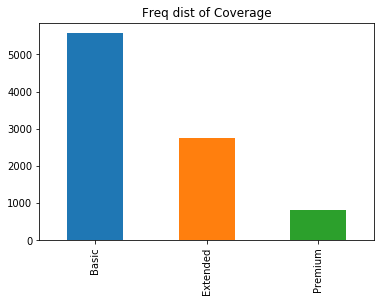

In [18]:
print(df_autoclaims_clean.groupby('Coverage').size())
df_autoclaims_clean['Coverage'].value_counts().plot.bar(title="Freq dist of Coverage")

Policy_Type
Corporate Auto    1968
Personal Auto     6788
Special Auto       378
dtype: int64


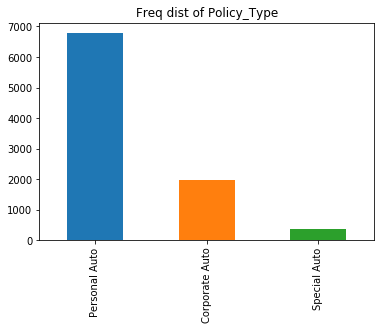

In [19]:
print(df_autoclaims_clean.groupby('Policy_Type').size())
df_autoclaims_clean['Policy_Type'].value_counts().plot.bar(title="Freq dist of Policy_Type")

Claim_Reason
Collision       3752
Hail            2926
Other           1024
Scratch/Dent    1432
dtype: int64


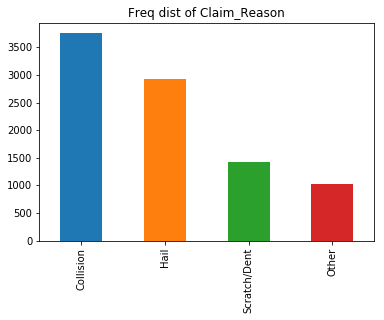

In [20]:
print(df_autoclaims_clean.groupby('Claim_Reason').size())
df_autoclaims_clean['Claim_Reason'].value_counts().plot.bar(title="Freq dist of Claim_Reason")

Sales_Channel
Agent          3477
Branch         2567
Call Center    1765
Web            1325
dtype: int64


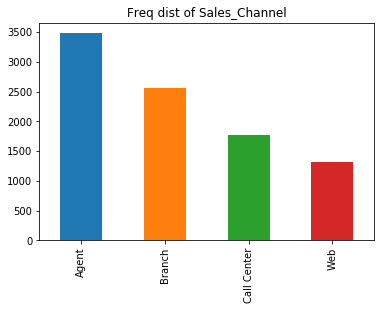

In [21]:
print(df_autoclaims_clean.groupby('Sales_Channel').size())
df_autoclaims_clean['Sales_Channel'].value_counts().plot.bar(title="Freq dist of Sales_Channel")

Vehicle_Size
Large       946
Medsize    6424
Small      1764
dtype: int64


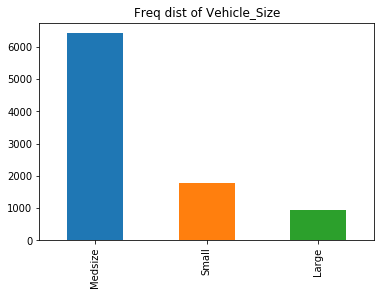

In [22]:
print(df_autoclaims_clean.groupby('Vehicle_Size').size())
df_autoclaims_clean['Vehicle_Size'].value_counts().plot.bar(title="Freq dist of Vehicle_Size")

Vehicle_Class
Four-Door Car    4621
Luxury Car        163
Luxury SUV        184
SUV              1796
Sports Car        484
Two-Door Car     1886
dtype: int64


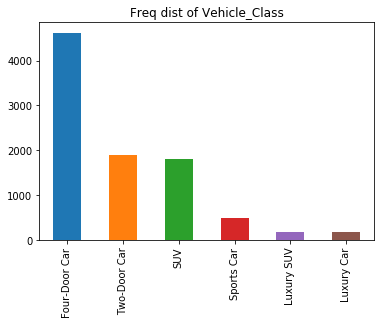

In [23]:
print(df_autoclaims_clean.groupby('Vehicle_Class').size())
df_autoclaims_clean['Vehicle_Class'].value_counts().plot.bar(title="Freq dist of Vehicle_Class")

## Bivariate Analysis
Let's study the relationship between two numeric variables. This can be achieved by looking for correlations between every pair of features and the target variable using the **corr()** function.

In [24]:
corr = df_autoclaims_clean.corr()
corr

,Claim_Amount,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
Claim_Amount,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly_Premium_Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months_Since_Last_Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months_Since_Policy_Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number_of_Open_Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number_of_Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total_Claim_Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


We can also inlude a headmap to help visualize any correlations a little easier. In the heat map the brighter colors indicate more correlation.

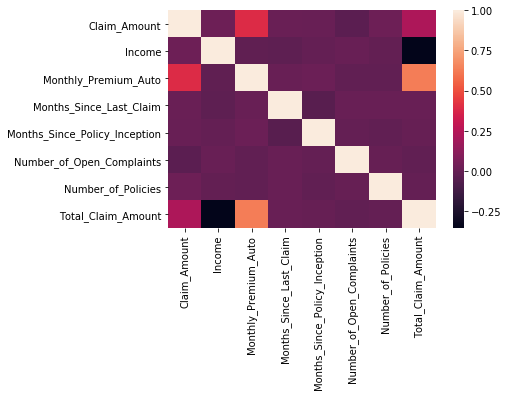

In [25]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

However, these correlation analysis functions only observe numeric features, not categorical. To enrich our analysis more, it would be helpful to transform some of our categorical data to numeric data to add to our analysis.

## Feature Engineering
Now that we have a better understanding of our data, it has become obvious that some additional features could be generated based on the features we already have that could add to our analysis.

In [26]:
df_autoclaims_encoded = df_autoclaims_clean.copy()

Encode nominal categorical features

In [27]:
def cat_nominal_transform(s):
    gle = LabelEncoder()
    labels = gle.fit_transform(s)
    mappings = {index: label for index, label in enumerate(gle.classes_)}
    return labels, mappings

In [28]:
emp_status_labels, emp_status_mappings = cat_nominal_transform(df_autoclaims_encoded['Employment_Status'])
df_autoclaims_encoded['Employment_Status_Encoded'] = emp_status_labels
print(emp_status_mappings)

marital_status_labels, marital_status_mappings = cat_nominal_transform(df_autoclaims_encoded['Marital_Status'])
df_autoclaims_encoded['Marital_Status_Encoded'] = marital_status_labels
print(marital_status_mappings)

policy_type_labels, policy_type_mappings = cat_nominal_transform(df_autoclaims_encoded['Policy_Type'])
df_autoclaims_encoded['Policy_Type_Encoded'] = policy_type_labels
print(policy_type_mappings)

claim_reason_labels, claim_reason_mappings = cat_nominal_transform(df_autoclaims_encoded['Claim_Reason'])
df_autoclaims_encoded['Claim_Reason_Encoded'] = claim_reason_labels
print(claim_reason_mappings)

sales_channel_labels, sales_channel_mappings = cat_nominal_transform(df_autoclaims_encoded['Sales_Channel'])
df_autoclaims_encoded['Sales_Channel_Encoded'] = sales_channel_labels
print(sales_channel_mappings)

vehicle_class_labels, vehicle_class_mappings = cat_nominal_transform(df_autoclaims_encoded['Vehicle_Class'])
df_autoclaims_encoded['Vehicle_Class_Encoded'] = vehicle_class_labels
print(vehicle_class_mappings)

{0: 'Disabled', 1: 'Employed', 2: 'Medical Leave', 3: 'Retired', 4: 'Unemployed'}
{0: 'Divorced', 1: 'Married', 2: 'Single'}
{0: 'Corporate Auto', 1: 'Personal Auto', 2: 'Special Auto'}
{0: 'Collision', 1: 'Hail', 2: 'Other', 3: 'Scratch/Dent'}
{0: 'Agent', 1: 'Branch', 2: 'Call Center', 3: 'Web'}
{0: 'Four-Door Car', 1: 'Luxury Car', 2: 'Luxury SUV', 3: 'SUV', 4: 'Sports Car', 5: 'Two-Door Car'}


Encode ordinal categorical features

In [29]:
coverage_map = {'Basic': 0, 'Extended': 1, 'Premium': 2}
df_autoclaims_encoded['Coverage_Encoded'] = df_autoclaims_encoded['Coverage'].map(coverage_map)
print(coverage_map)

ed_map = {'High School or Below': 0, 'College': 1, 'Bachelor': 2, 'Master': 3, 'Doctor': 4}
df_autoclaims_encoded['Education_Encoded'] = df_autoclaims_encoded['Education'].map(ed_map)
print('Coverage Encodings: {}'.format(ed_map))

veh_size_map = {'Small': 0, 'Medsize': 1, 'Large': 2}
df_autoclaims_encoded['Vehicle_Size_Encoded'] = df_autoclaims_encoded['Vehicle_Size'].map(veh_size_map)
print(veh_size_map)

df_autoclaims_encoded['Response_Encoded'] = df_autoclaims_encoded['Response'].map({'Yes': 1, 'No': 0})
df_autoclaims_encoded['Gender_Encoded'] = df_autoclaims_encoded['Gender'].map({'M':1, 'F':0})

{'Basic': 0, 'Extended': 1, 'Premium': 2}
Coverage Encodings: {'High School or Below': 0, 'College': 1, 'Bachelor': 2, 'Master': 3, 'Doctor': 4}
{'Small': 0, 'Medsize': 1, 'Large': 2}


Encode nomincal categorical data to new features

In [30]:
df_autoclaims_encoded = pd.concat([df_autoclaims_encoded, pd.get_dummies(df_autoclaims_encoded.Employment_Status, prefix='emp_stat')], axis=1)
df_autoclaims_encoded = pd.concat([df_autoclaims_encoded, pd.get_dummies(df_autoclaims_encoded.Marital_Status, prefix='m_stat')], axis=1)
df_autoclaims_encoded = pd.concat([df_autoclaims_encoded, pd.get_dummies(df_autoclaims_encoded.Policy_Type, prefix='p_type')], axis=1)
df_autoclaims_encoded = pd.concat([df_autoclaims_encoded, pd.get_dummies(df_autoclaims_encoded.Claim_Reason, prefix='claim_rsn')], axis=1)
df_autoclaims_encoded = pd.concat([df_autoclaims_encoded, pd.get_dummies(df_autoclaims_encoded.Sales_Channel, prefix='s_chnl')], axis=1)
df_autoclaims_encoded = pd.concat([df_autoclaims_encoded, pd.get_dummies(df_autoclaims_encoded.Vehicle_Class, prefix='veh_cls')], axis=1)

In [31]:
print(df_autoclaims_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 62 columns):
Customer                         9134 non-null object
Country                          9134 non-null category
State_Code                       9134 non-null category
State                            9134 non-null category
Claim_Amount                     9134 non-null float64
Response                         9134 non-null category
Coverage                         9134 non-null category
Education                        9134 non-null category
Effective_To_Date                9134 non-null datetime64[ns]
Employment_Status                9134 non-null category
Gender                           9134 non-null category
Income                           9134 non-null int64
Location_Code                    9134 non-null category
Marital_Status                   9134 non-null category
Monthly_Premium_Auto             9134 non-null int64
Months_Since_Last_Claim          9134 non-null int64
Mon

# Evaluate Algorithms
Now let's create some models of the data and estimate their accuracy on unseen data.


First we'll start by separating out a validation dataset. This will help us make sure our model is good later in our selection. This means we are going to hold back some data that the algorithms will not get to see and we will use this data to get a second and independent idea on how accurate the best model might be.

In [41]:
df_autoclaims_data = df_autoclaims_encoded[['Claim_Amount','Income', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim',
                       'Months_Since_Policy_Inception', 'Number_of_Open_Complaints','Number_of_Policies', 
                       'Total_Claim_Amount', 'Coverage_Encoded', 'Education_Encoded','Vehicle_Size_Encoded', 
                       'Response_Encoded', 'Gender_Encoded','emp_stat_Disabled', 'emp_stat_Employed', 
                       'emp_stat_Medical Leave', 'emp_stat_Retired', 'emp_stat_Unemployed', 'm_stat_Divorced',
                       'm_stat_Married', 'm_stat_Single', 'p_type_Corporate Auto','p_type_Personal Auto',
                       'p_type_Special Auto', 'claim_rsn_Collision', 'claim_rsn_Hail', 'claim_rsn_Other', 
                       'claim_rsn_Scratch/Dent','s_chnl_Agent', 's_chnl_Branch', 's_chnl_Call Center', 's_chnl_Web',
                       'veh_cls_Four-Door Car', 'veh_cls_Luxury Car', 'veh_cls_Luxury SUV', 'veh_cls_SUV', 
                       'veh_cls_Sports Car', 'veh_cls_Two-Door Car']]

df_autoclaims_tgt = df_autoclaims_encoded.loc[:, 'Location_Code'].values.astype('object')

print('df_autoclaims_data datatype = {0} and df_autoclaims_tgt datatype = {1}'.format(type(df_autoclaims_data), 
                                                                                 type(df_autoclaims_tgt)))

df_autoclaims_data datatype = <class 'pandas.core.frame.DataFrame'> and df_autoclaims_tgt datatype = <class 'numpy.ndarray'>


In [36]:
from sklearn.model_selection import train_test_split

# Split-Out validation dataset, 70% to train, 30% to validate/test
X_train, X_test, y_train, y_test = train_test_split(df_autoclaims_data, 
                                                    df_autoclaims_tgt, 
                                                    test_size=0.3, 
                                                    random_state = 42,
                                                    stratify=df_autoclaims_tgt)

print('Training Data Shape: X - {0}, Y-{1} \n Testing Data Shape: X - {2}, Y - {3}'.format(X_train.shape,
                                                                                          y_train.shape,
                                                                                          X_test.shape,
                                                                                          y_test.shape))

Training Data Shape: X - (6393, 38), Y-(6393,) 
 Testing Data Shape: X - (2741, 38), Y - (2741,)


We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results. So lets evaluate a mix of linear and non-linear algorithms.

In [59]:
import matplotlib.pyplot as plt
from pprint import pprint 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

def get_classifier_accuracies_comparison(X_train, y_train, X_test, y_test):
    # Compare accuracy of default classification algorithms.
    # Define the classifiers
    
    #['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
    classifiers = {'Logistic Regression':LogisticRegression(multi_class='multinomial', solver = 'saga'), 
                   'Random Forest': RandomForestClassifier(n_jobs=2, random_state=0, n_estimators=100),
                   'SVM (Linear)':LinearSVC(dual=False), 
                   'SVM':SVC(gamma='auto'), 
                   'KNeighbors':KNeighborsClassifier(3)
                  }

    classifiers_accuracy = {}

    
    # Fit the classifiers
    for label, c in classifiers.items():
        c.fit(X_train, y_train)
        y_pred = c.predict(X_test)
        
        # how did our model perform?
        count_misclassified = (y_test != y_pred).sum()
        print('[{0}] Misclassified samples = {1}'.format(label, count_misclassified))
        
        accuracy_score = c.score(X_test, y_test)
        classifiers_accuracy.update( {label:accuracy_score} )
        print("[{0}] accuracy = {1} %\n".format(label, (round(accuracy_score,4) * 100)))
        


    return classifiers_accuracy

In [60]:
classifes_compare = get_classifier_accuracies_comparison(X_train, y_train, X_test, y_test)

C:\Users\jejohn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[Logistic Regression] Misclassified samples = 564
[Logistic Regression] accuracy = 79.42 %

[Random Forest] Misclassified samples = 162
[Random Forest] accuracy = 94.08999999999999 %

[SVM (Linear)] Misclassified samples = 60
[SVM (Linear)] accuracy = 97.81 %

[SVM] Misclassified samples = 912
[SVM] accuracy = 66.73 %

[KNeighbors] Misclassified samples = 653
[KNeighbors] accuracy = 76.18 %



# Model Selection

Now let's compare the accuracy of each model to select our best model:

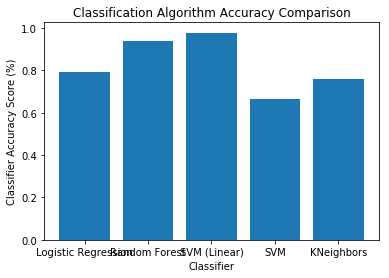

{'KNeighbors': 0.7617657789128055,
 'Logistic Regression': 0.79423568040861,
 'Random Forest': 0.9408974826705582,
 'SVM': 0.6672747172564757,
 'SVM (Linear)': 0.9781101787668735}


In [61]:
plt.bar(range(len(classifes_compare)), list(classifes_compare.values()))
plt.xticks(range(len(classifes_compare)), list(classifes_compare.keys()))
plt.ylabel('Classifier Accuracy Score (%)')
plt.xlabel('Classifier')
plt.title('Classification Algorithm Accuracy Comparison')
plt.show()
    
pprint(classifes_compare)

## Make Predictions
The Linear SVC algorithm was the most accurate with the least misses that we tested. Now we want to get an idea of the accuracy of the model with out test dataset. To do this we wll check the accuracy again, as well as provide a classification report and confusion matrix. The confusion matrix provides an indication of the three errors made. The classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results.

In [62]:
c = LinearSVC(dual=False)
c.fit(X_train, y_train)
y_pred = c.predict(X_test)
        
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('[LinearSVC] Misclassified samples = {0}'.format( count_misclassified))
accuracy_score = c.score(X_test, y_test)
print("[LinearSVC] accuracy = {0} %".format((round(accuracy_score,4) * 100)))

#print('\n\n')
#print("[LinearSVC] F1 Score = {0}".format(round(f1_score(y_test, y_pred, average="macro"), 4)))
#print("[LinearSVC] Percision Score = {0}".format(round(precision_score(y_test, y_pred, average="macro"),4)))
#print("[LinearSVC] Recall Score = {0}".format(round(recall_score(y_test, y_pred, average="macro"),4))) 

print('\n\nClassification Report:')
print(classification_report(y_test, y_pred))

print('\n\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

[LinearSVC] Misclassified samples = 60
[LinearSVC] accuracy = 97.81 %


Classification Report:
             precision    recall  f1-score   support

      Rural       0.97      1.00      0.98       532
   Suburban       0.98      1.00      0.99      1734
      Urban       1.00      0.87      0.93       475

avg / total       0.98      0.98      0.98      2741



Confusion Matrix:
[[ 532    0    0]
 [   0 1734    0]
 [  19   41  415]]


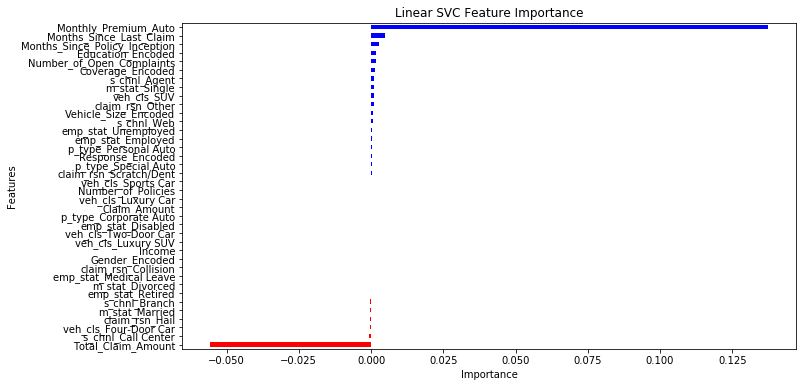

In [63]:
coeff = list(c.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.title('Linear SVC Feature Importance')
plt.xlabel('Importance')
plt.show()